---
# <a style="color:orange; font-style: italics">Analysis of Customers and Churn Rate in Databel </a>
---

### <span style="">Table of Contents</span>

- <a href="#overview">Overview</a>
- <a href="#wrangling">Data Wrangling</a>
- <a href="#cleaning">Data Cleaning</a>
- <a href="#eda">Exploratory Data Analysis</a>
- <a href="#corr">Correlation</a>
- <a href="#conclusions">Conclusions</a>
---

###  Case & Overview <a id="overview"></a>
Databel is an internet service provider with over six thousand customers across the fifty one states in the US.
The board, however have some questions; all centered on the recent increase in customer churn rate.

In order to help them draw understand the various patterns in the twenty feature of their customer base, I set up this analysis. 
With the insights and conclusions presented, they would be able to make data-driven decisions towards customer retention 

#### Importing Dependencies

In [1]:
# Utitlity Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Wrangling <a id="wrangling"></a>

In [2]:
# Loading Data
data = pd.read_csv("Databel - Data.csv")
data.head(3)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN


### *Some features the data holds*
- ***CustomerID*** - Unique identification for each customer
- ***Churn Label*** - Whether or not a customer has churned
- ***Account Length (in months)*** - Customer tenure
- ***Local Calls*** - Number of local calls made
- ***Local mins*** - time spent on local calls made
- ***Int Calls*** - Number of international calls made
- ***Intl mins*** - time spent on local calls made
- ***Intl Active*** - whether customer is currently subscribed to an international plan
- ***Intl Plan*** - whether or not customer ever subscribed to an international plan
- ***Extra International Charges*** - charges incurred on internatoinal calls
- ***Customer Service Calls*** - number of calls put across for help from customer service
- ***Avg Monthly Download*** - downloads of each customer per month
- ***Unlimited Data Plan*** - whether or not the customer subscribed for unlimited data.
- ***Phone Number*** - of each customer
- ***Gender*** - of each customer
- ***Age*** - the age of each customer
- ***Contract Type*** - the subscription basis of each customer
- ***Payment Method*** - means of payment
- ***Monthly Charges*** - charges incurred on each customer on a monthly basis
- ***Total Charges*** - total charges incurred on each customer
- ***Churn Category*** - classes of churns
- ***Churn Reason*** - the reason for the churn of a customer

In [3]:
data.shape

(6687, 29)

In [4]:
data.columns

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')

### Data Cleaning <a id="cleaning"></a>

#### Check for Null values

In [5]:
data.isna().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

#### Check for Duplicates

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

## E - D - A  <a id="eda"></a>

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Length (in months),6687.0,32.337820,24.595689,1.0,9.0,29.0,55.00,77.0
Local Calls,6687.0,130.974129,121.893966,1.0,31.0,98.0,199.00,918.0
Local Mins,6687.0,322.752864,288.619931,4.0,76.9,250.5,498.05,1234.2
Intl Calls,6687.0,51.097524,103.592369,0.0,0.0,0.0,52.00,1120.0
Intl Mins,6687.0,130.070624,243.527828,0.0,0.0,0.0,140.40,1372.5
Extra International Charges,6687.0,33.641783,76.346828,0.0,0.0,0.0,16.40,585.8
Customer Service Calls,6687.0,0.915657,1.411484,0.0,0.0,0.0,2.00,5.0
Avg Monthly GB Download,6687.0,6.696276,7.454339,0.0,1.0,5.0,9.00,43.0
Extra Data Charges,6687.0,3.374458,12.565309,0.0,0.0,0.0,0.00,99.0
Age,6687.0,47.448632,16.969893,19.0,33.0,47.0,60.00,85.0


In [9]:
data.describe(include="object").T

,count,unique,top,freq
Customer ID,6687,6687,4444-BZPU,1
Churn Label,6687,2,No,4891
Intl Active,6687,2,No,4116
Intl Plan,6687,2,no,6036
Unlimited Data Plan,6687,2,Yes,4494
State,6687,51,WV,213
Phone Number,6687,6677,359-9794,2
Gender,6687,3,Male,3379
Under 30,6687,2,No,5400
Senior,6687,2,No,5460


In [10]:
sns.set(rc = {'figure.figsize':(11,3)})

#### Number of features against number of customers

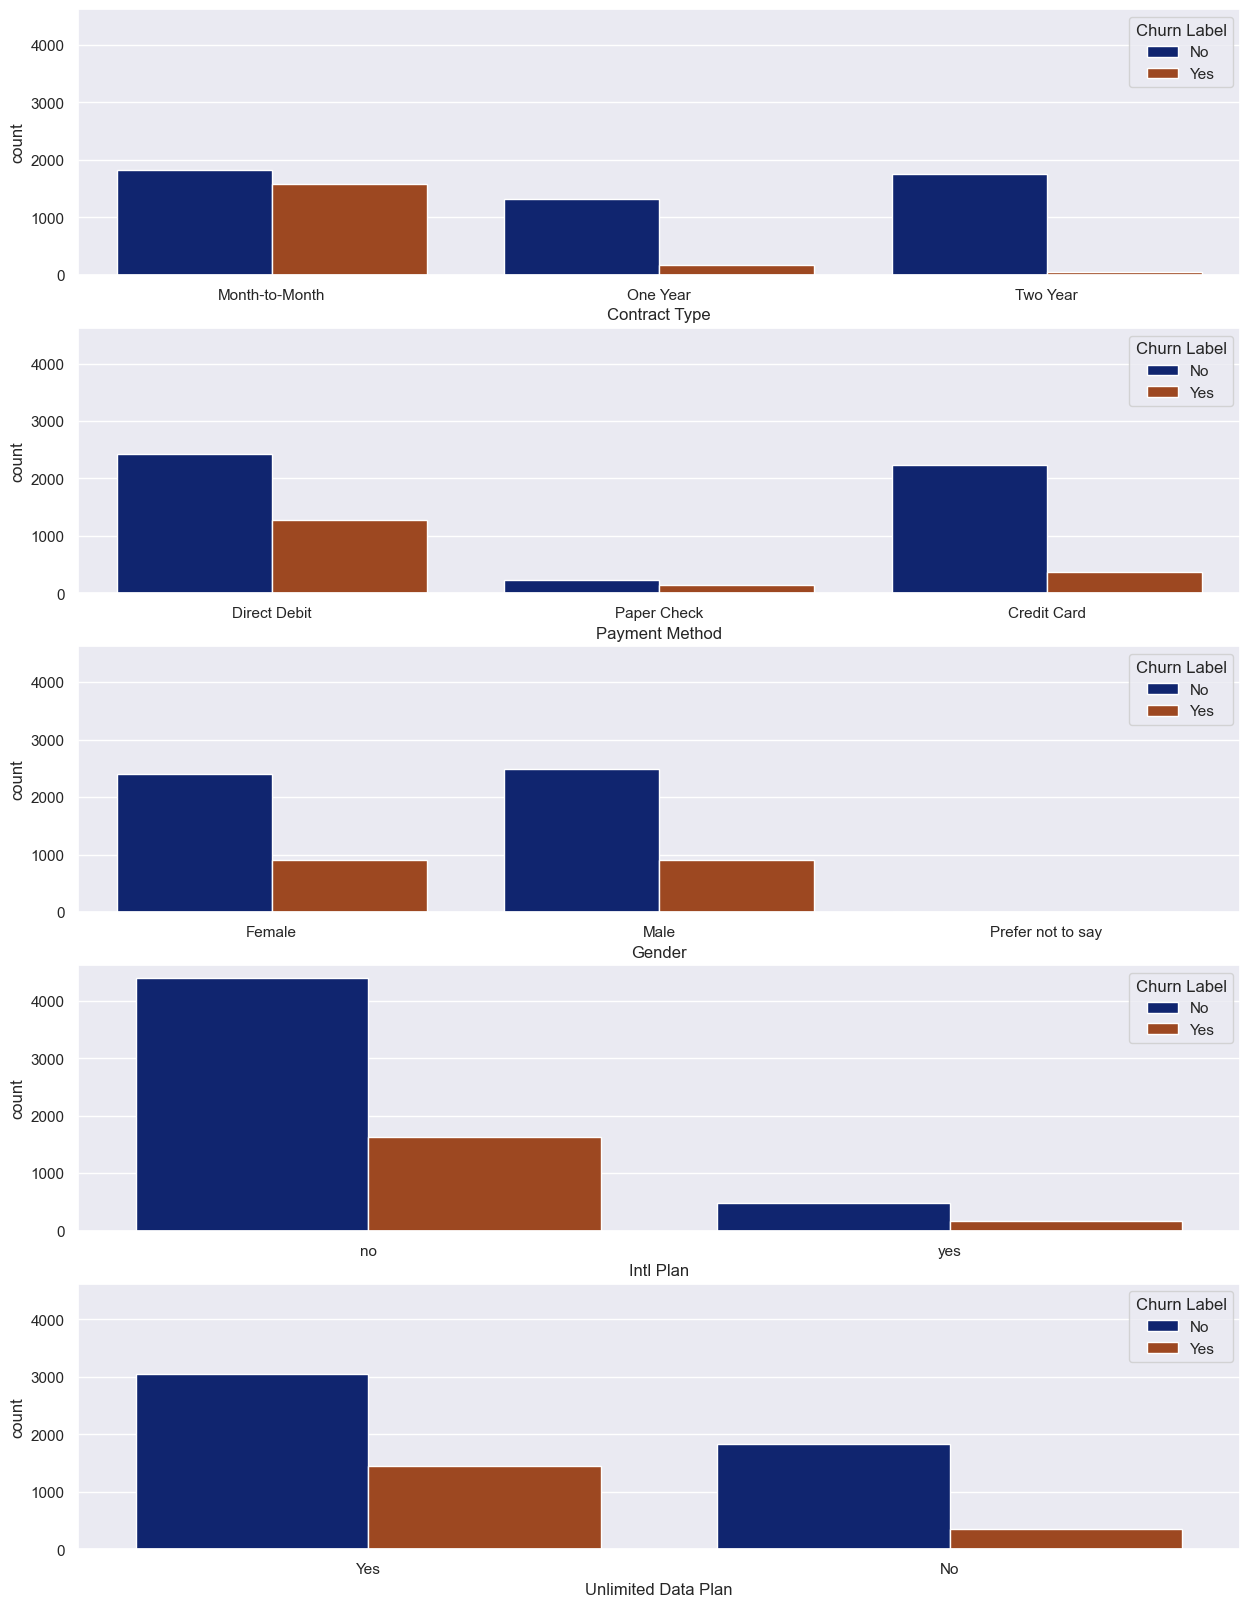

In [11]:
with sns.color_palette("dark"):
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), sharey=True)
    sns.countplot(x = "Contract Type", data = data ,hue="Churn Label", ax=axes[0])
    sns.countplot(x = "Payment Method", data = data ,hue="Churn Label", ax=axes[1])
    sns.countplot(x = "Gender", data = data ,hue="Churn Label", ax=axes[2])
    sns.countplot(x = "Intl Plan", data = data ,hue="Churn Label", ax=axes[3])
    sns.countplot(x = "Unlimited Data Plan", data = data ,hue="Churn Label", ax=axes[4])

#### Does customer tenure really affect rate of churn ?

Text(0.5, 0, 'Customer Tenure (in months)')

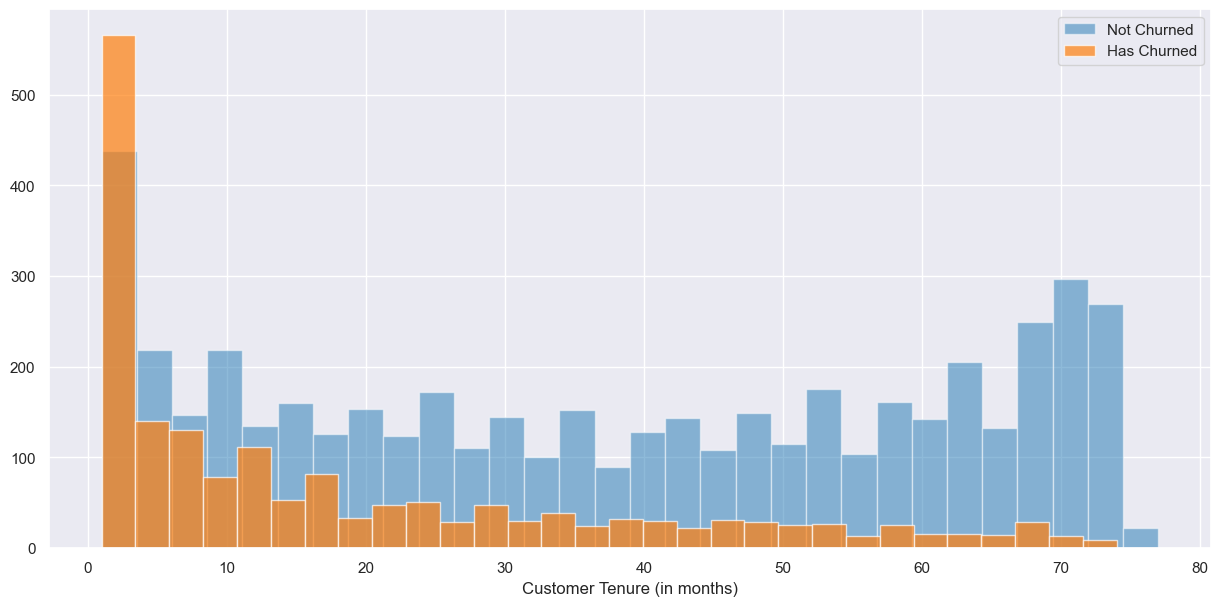

In [12]:
plt.figure(figsize=(15,7))

data[data['Churn Label']=="No"]['Account Length (in months)'].hist(alpha=0.5,color='#1f77b4',
                                              bins=30,label='Not Churned')
data[data['Churn Label']=="Yes"]['Account Length (in months)'].hist(alpha=0.7,color='#ff7f0e',
                                              bins=30,label='Has Churned')
plt.legend()
plt.xlabel('Customer Tenure (in months)')

#### The most likely cause of Customer Churn

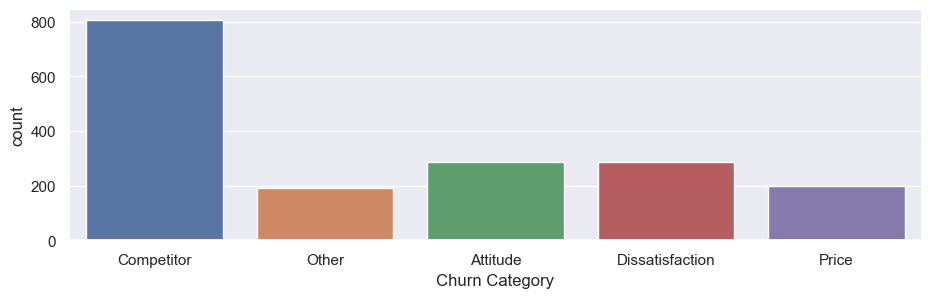

In [13]:
k = sns.countplot("Churn Category", data=data)

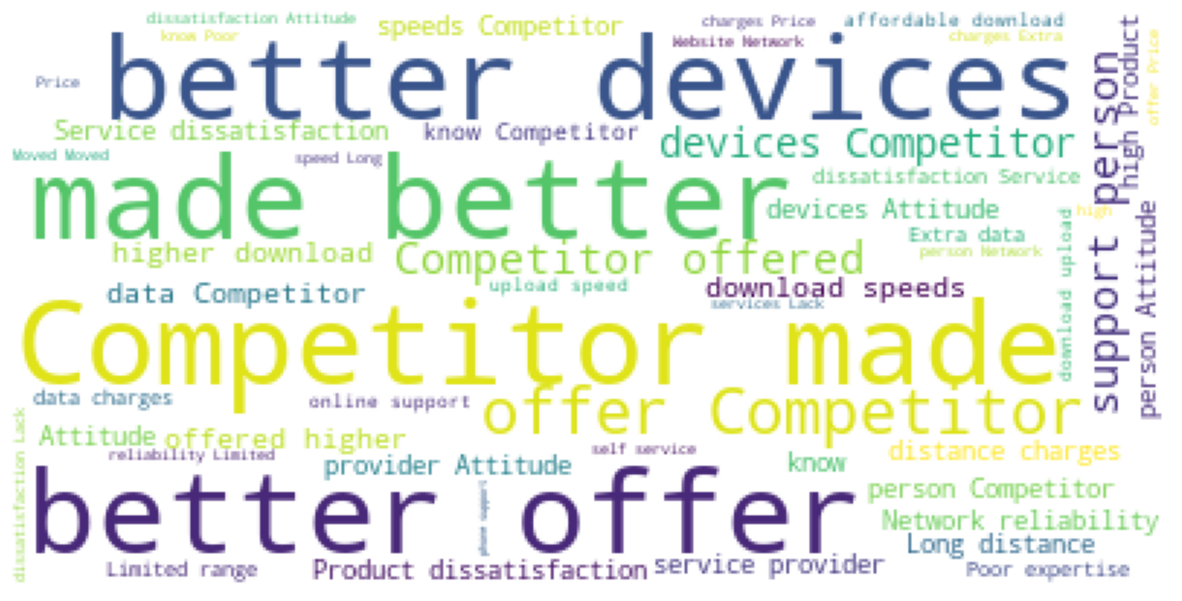

In [14]:
import wordcloud
texts = " ".join(data.dropna()["Churn Reason"])
stopwords = wordcloud.STOPWORDS 
wordcloud = wordcloud.WordCloud(background_color= "White", stopwords = stopwords ,
                               max_words = 100, max_font_size= 40, random_state = 100).generate(texts)

plt.figure(figsize = (15,10), facecolor = None)
plt.axis("off")
plt.imshow(wordcloud);

In [15]:
print("High-spending customers")
monetary_value = data.groupby("Customer ID")["Total Charges"].sum()
monetary_value.nlargest(5)

High-spending customers


Customer ID
9925-BAHT    5574
2587-PPLS    5473
8044-UXPB    5392
0907-JZAS    5375
1466-BXSQ    5347
Name: Total Charges, dtype: int64

In [16]:
print("Customers with the longest tenure")
lifetime_value = data.groupby("Customer ID")["Account Length (in months)"].sum()
lifetime_value.nlargest(5)

Customers with the longest tenure


Customer ID
0353-VDEC    77
1574-ELQD    77
1919-WWCI    77
6785-IEUJ    77
9277-KJYZ    77
Name: Account Length (in months), dtype: int64

In [17]:
print("States with majority of our customers")
states = data.groupby("State")["Customer ID"].count()
states.nlargest(5)

States with majority of our customers


State
WV    213
MN    168
NY    167
AL    161
OH    158
Name: Customer ID, dtype: int64

In [18]:
print("States with most customers that have churned")
states_churned = data[data["Churn Label"] == "Yes"].groupby("State")["Churn Label"].count()
states_churned.nlargest(5)

States with most customers that have churned


State
WV    57
OH    55
OR    48
AL    46
MD    46
Name: Churn Label, dtype: int64

In [19]:
statesDF = pd.DataFrame([states, states_churned])
statesDF = statesDF.T

statesDF.reset_index(inplace=True)
statesDF.columns = ["State", "Number of Customers", "Customers Churned"]
statesDFSorted = statesDF.sort_values(by="Number of Customers", ascending=False)
statesDFSortedTop = statesDFSorted.head(10)

#### Churn rate across states

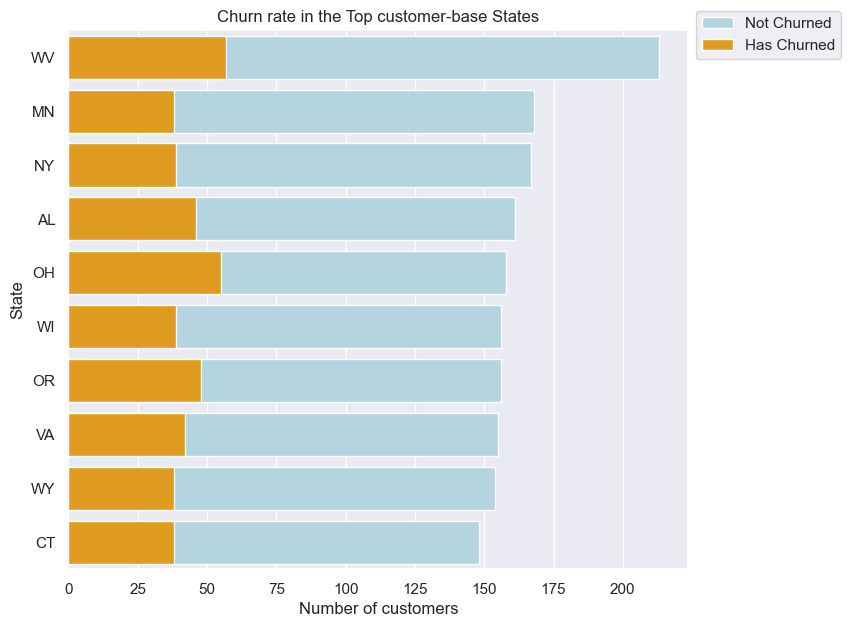

In [20]:
with sns.color_palette("dark"):
    plt.figure(figsize=(8,7))
    sns.barplot(y = "State", x = "Number of Customers", data = statesDFSortedTop, orient="h", palette=["lightblue"], label = "Not Churned")
    sns.barplot(y = "State", x = "Customers Churned", data = statesDFSortedTop, orient="h", palette=["orange"], label="Has Churned")
    plt.xlabel("Number of customers")
    plt.title("Churn rate in the Top customer-base States")
    plt.legend(bbox_to_anchor =(1.0, 1.05))

#### Spending patterns of customers in categories

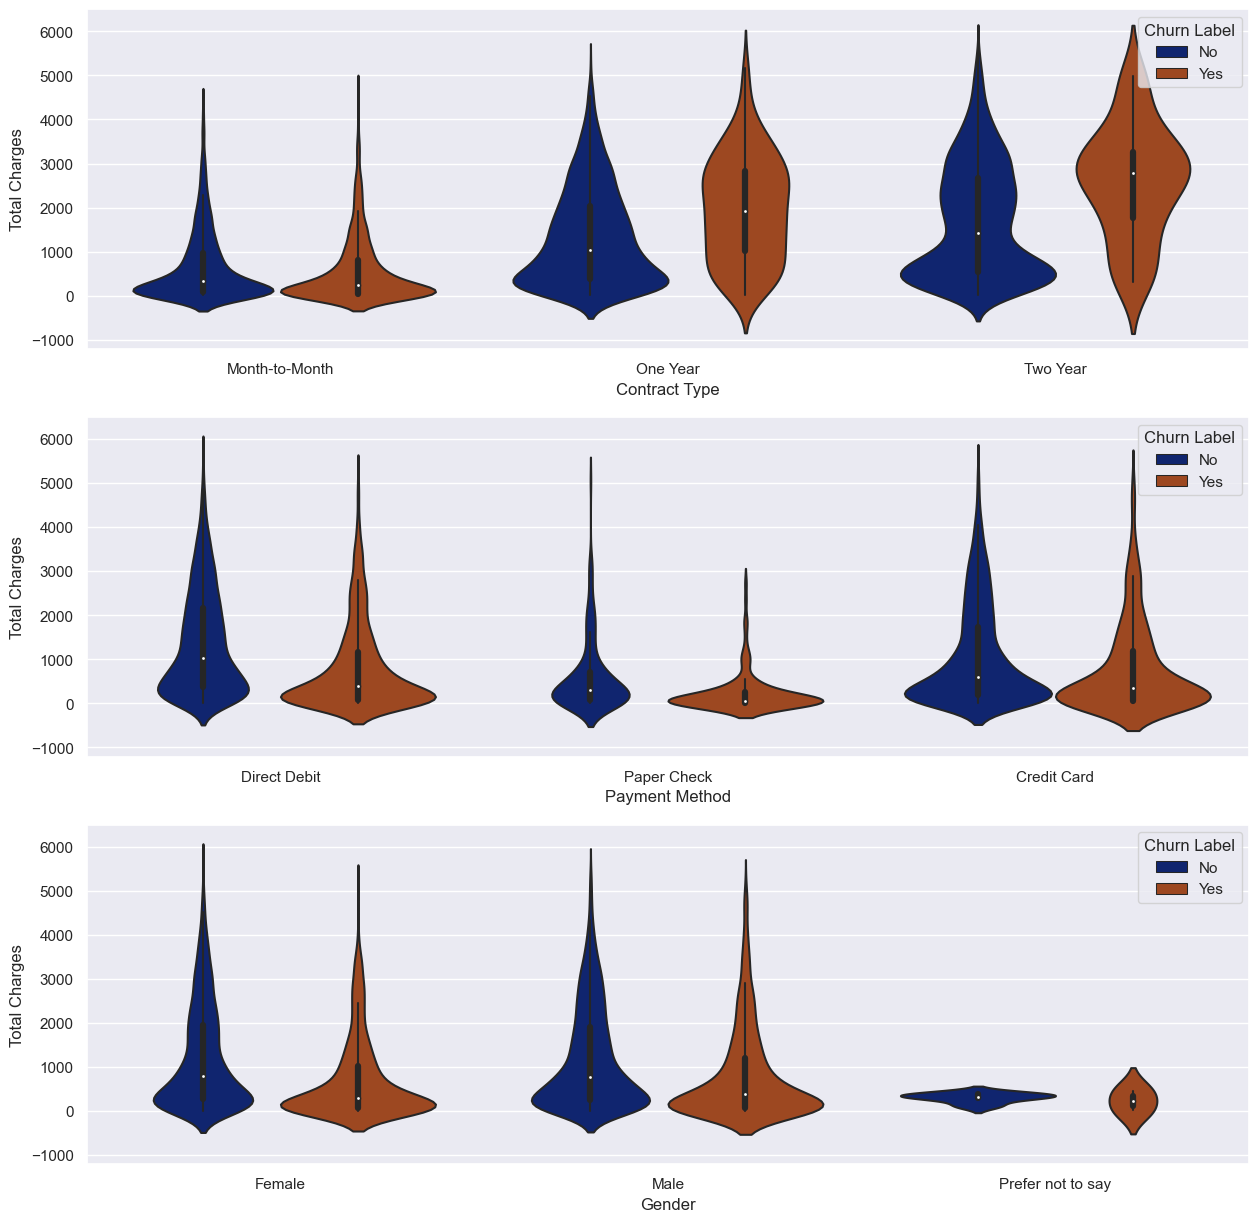

In [21]:
with sns.color_palette("dark"):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15), sharey=True)
    sns.violinplot(x = "Contract Type", y="Total Charges", data = data ,hue="Churn Label", ax=axes[0])
    sns.violinplot(x = "Payment Method", y="Total Charges", data = data ,hue="Churn Label", ax=axes[1])
    sns.violinplot(x = "Gender", y="Total Charges", data = data ,hue="Churn Label", ax=axes[2])

#### How does Total charges vary by different contract types ?

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

<Figure size 1100x700 with 0 Axes>

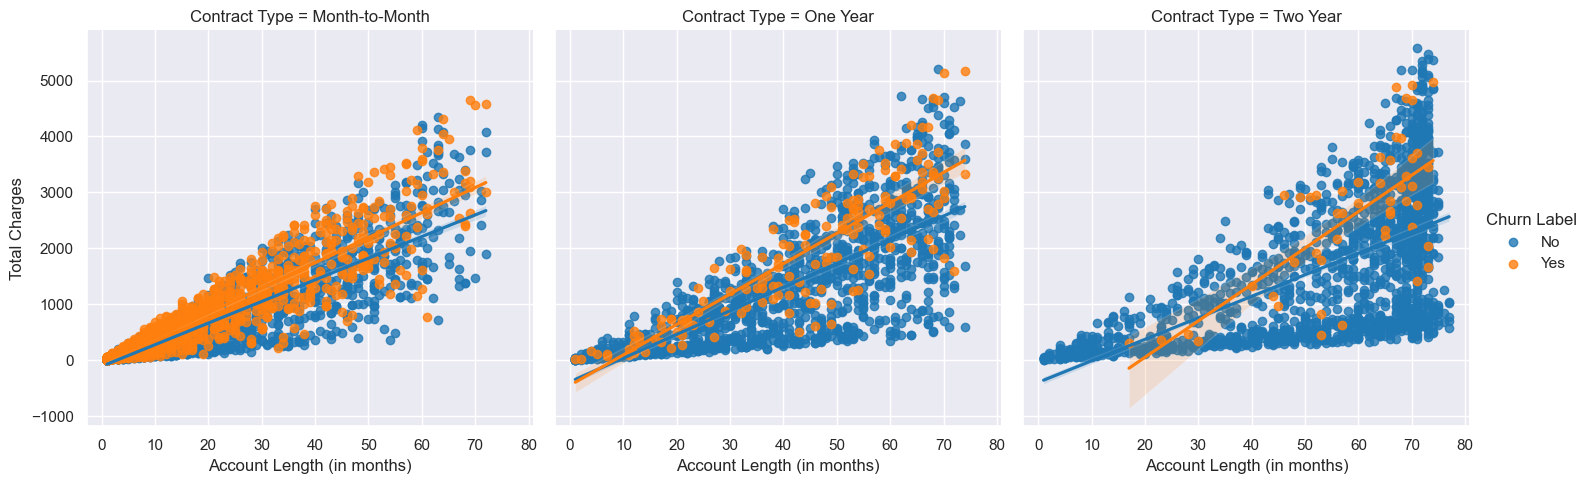

In [52]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Total Charges',x='Account Length (in months)',data=data,hue='Churn Label',
           col='Contract Type', palette=["#1f77b4","#ff7f0e"])

#### Average monthly download

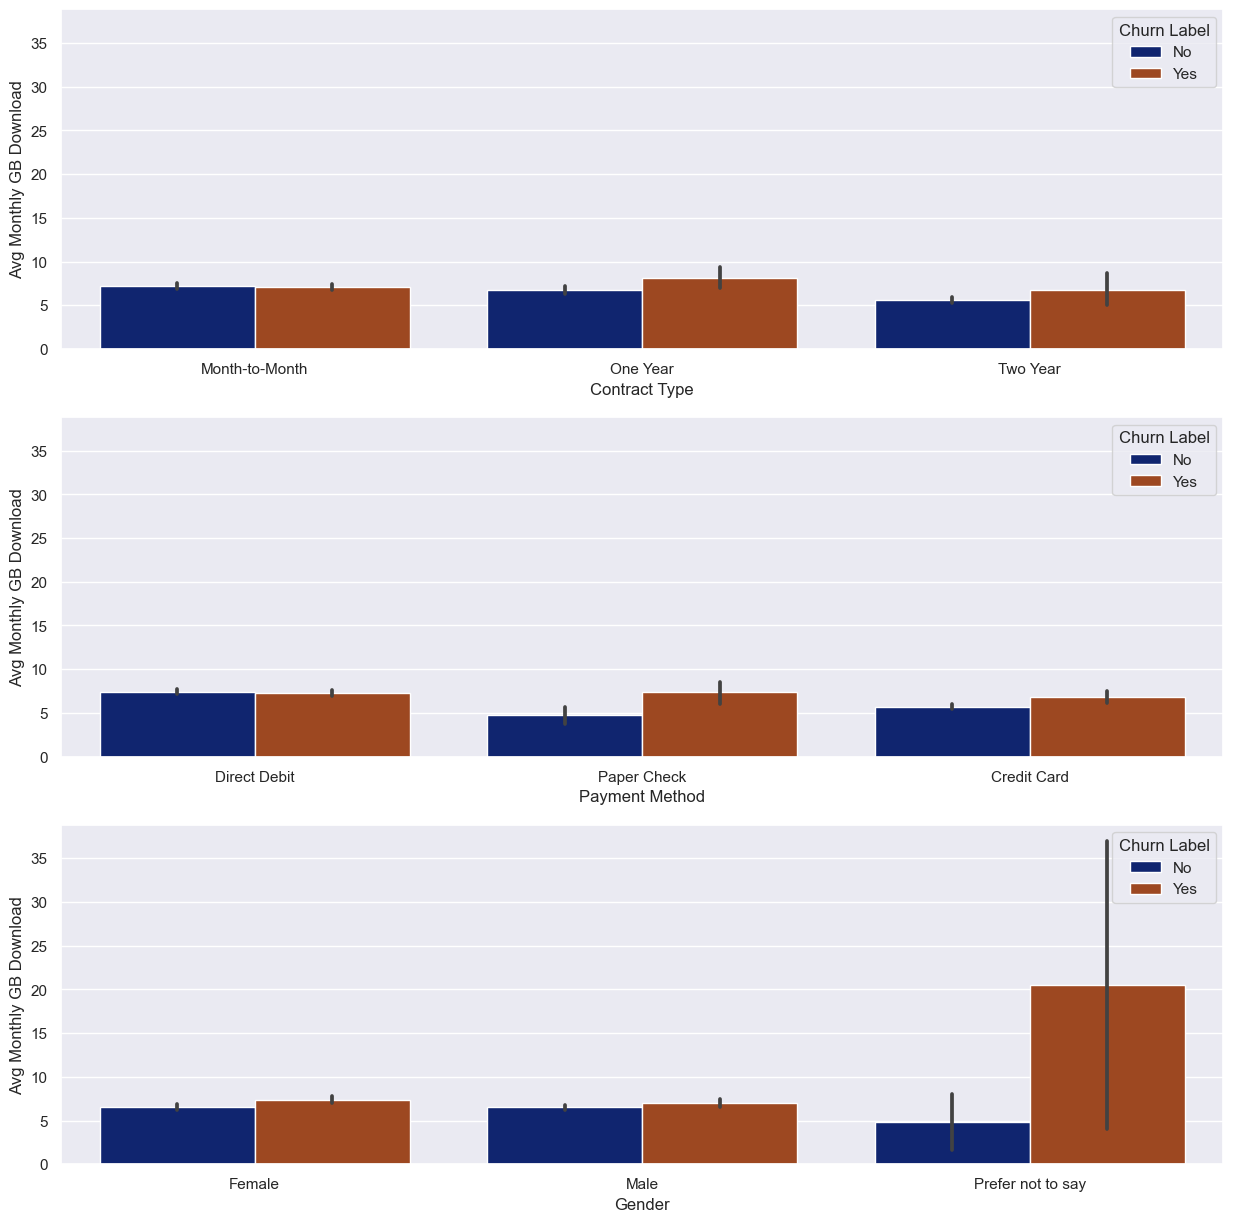

In [23]:
with sns.color_palette("dark"):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15), sharey=True)
    sns.barplot(x = "Contract Type", y="Avg Monthly GB Download", data = data ,hue="Churn Label", ax=axes[0])
    sns.barplot(x = "Payment Method", y="Avg Monthly GB Download", data = data ,hue="Churn Label", ax=axes[1])
    sns.barplot(x = "Gender", y="Avg Monthly GB Download", data = data ,hue="Churn Label", ax=axes[2])

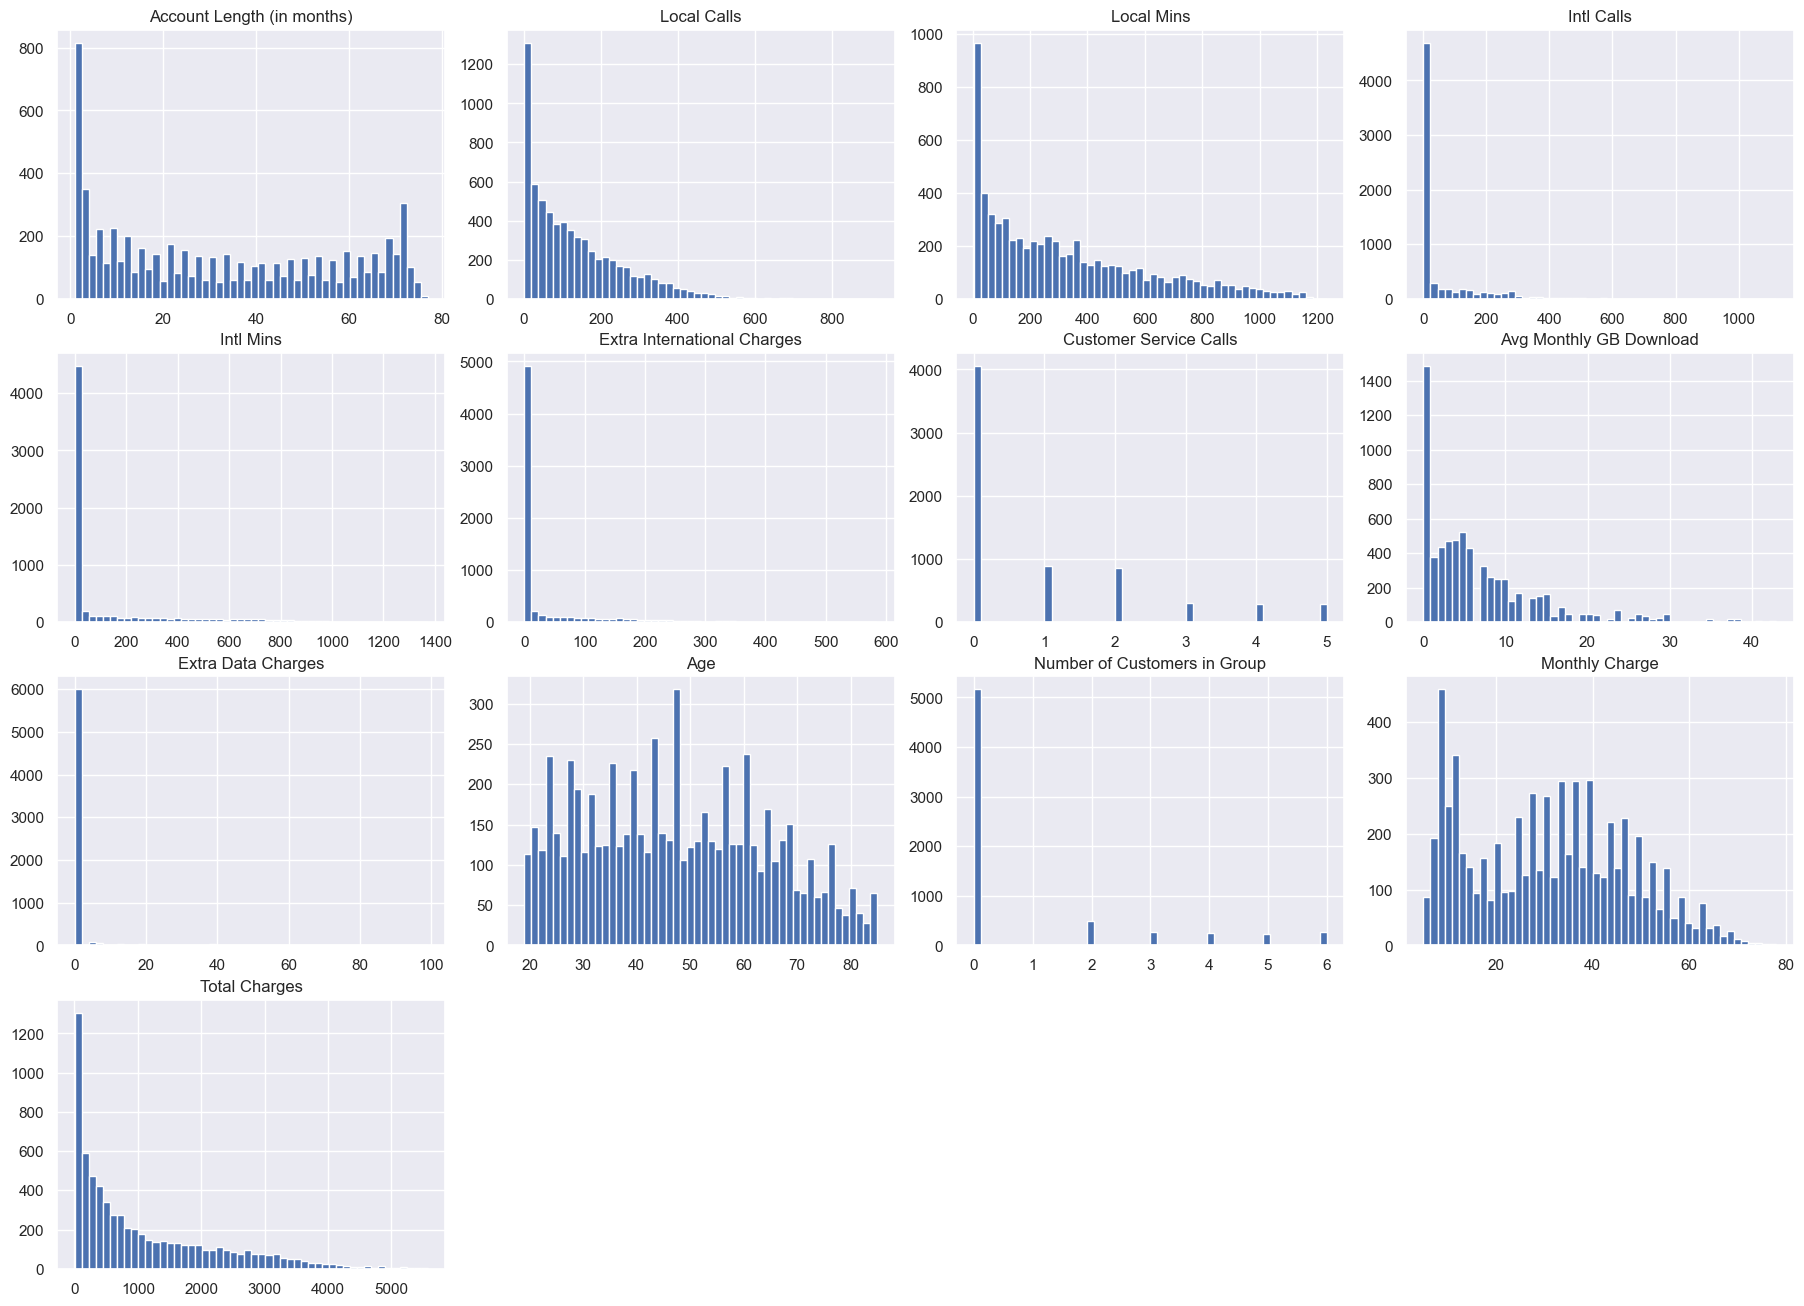

In [24]:
data.hist(bins=50, figsize=(18,13))
plt.tight_layout(pad=0.4)
plt.show()

### Correlation <a id= "corr"></a>

<AxesSubplot:>

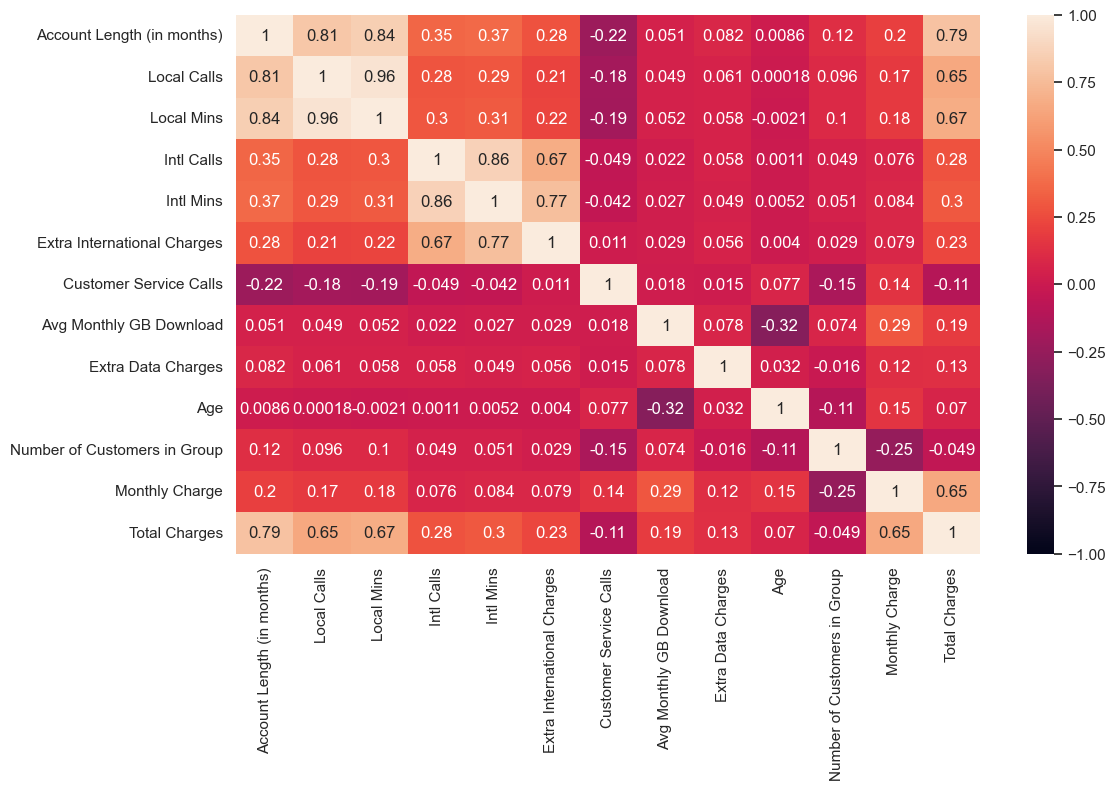

In [25]:
sns.set(rc = {'figure.figsize':(12,7)})
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax = 1)

#### What is the churn rate of Databel customers?

In [49]:
churn_label = data.groupby("Churn Label")["Customer ID"].count()
churn_rate = churn_label["Yes"]/data.shape[0]
churn_rate

0.2685808284731569


## Conclusions <a id="conclusions"></a>
<ol>
<li>The churn rate of customers is over 25% which is very alarming.</li>
<li>The likelihood to churn reduces with customer account length.</li>
<li>Majority of our customers prefer the Month-to-Month contract.</li>
<li>Our younger customers have more downloads.</li>
<li>The number of customer service calls reduces with customer tenure and loyalty.</li>
<li>Most of our lost customers left for competitor offers and prices.</li>
<li>Majority of our customers are in West Virginia (WV).</li>
<li>Customers with paper checks are less likely to spend heavily on data and calls.</li>
<
</ol>
<style>

li{
    font-size: 1.55rem;
}
</style>